In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.layers import Dropout, BatchNormalization

In [2]:
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
data = pd.read_csv("dataset.csv")

In [4]:
print(data.columns)

Index(['Ratio', 'F_angle', 'B_angle', 'Species'], dtype='object')


In [5]:
# Preprocess data
# Update these column names based on the actual column names in your dataset
X = data[['Ratio', 'F_angle', 'B_angle']]  # Selecting feature columns with correct names
y = data['Species']  # Selecting the label column

In [6]:
# Encode categorical target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = Sequential()
model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(24, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [10]:
# Step 5: Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Step 6: Train model
history = model.fit(X_train, y_train,
                    epochs=40,
                    batch_size=256,
                    validation_split=0.2)

Epoch 1/40
1/1 [==============================] - 2s 2s/step - loss: 1.1701 - accuracy: 0.4737 - val_loss: 1.0671 - val_accuracy: 0.2500
Epoch 2/40
1/1 [==============================] - 0s 38ms/step - loss: 1.0689 - accuracy: 0.5526 - val_loss: 1.0590 - val_accuracy: 0.3500
Epoch 3/40
1/1 [==============================] - 0s 39ms/step - loss: 1.1949 - accuracy: 0.4868 - val_loss: 1.0513 - val_accuracy: 0.4500
Epoch 4/40
1/1 [==============================] - 0s 47ms/step - loss: 1.0966 - accuracy: 0.4737 - val_loss: 1.0434 - val_accuracy: 0.4500
Epoch 5/40
1/1 [==============================] - 0s 57ms/step - loss: 0.8783 - accuracy: 0.5658 - val_loss: 1.0354 - val_accuracy: 0.4000
Epoch 6/40
1/1 [==============================] - 0s 58ms/step - loss: 0.8841 - accuracy: 0.5526 - val_loss: 1.0274 - val_accuracy: 0.5000
Epoch 7/40
1/1 [==============================] - 0s 37ms/step - loss: 0.8364 - accuracy: 0.6316 - val_loss: 1.0190 - val_accuracy: 0.5500
Epoch 8/40
1/1 [=============

In [12]:
# Step 7: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 24ms/step - loss: 0.6662 - accuracy: 0.9200
Test Accuracy: 0.9200


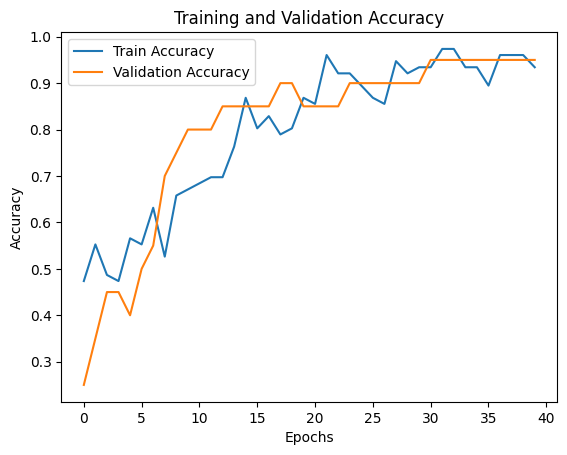

In [13]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

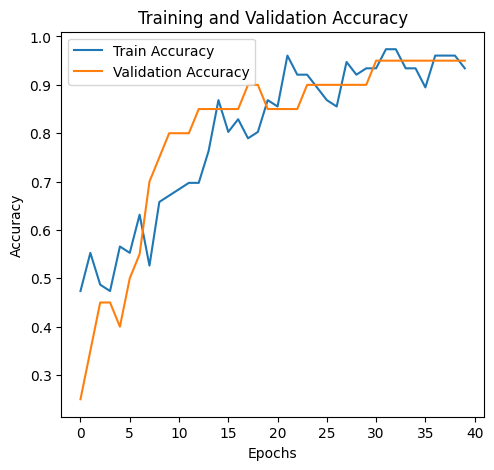

In [14]:
# Step 8: Plot accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [16]:
# Step 7: Train model with early stopping
history = model.fit(X_train, y_train,
                    epochs=60,  # Start with a higher number of epochs
                    batch_size=256,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/60
1/1 [==============================] - 0s 353ms/step - loss: 0.1830 - accuracy: 0.9605 - val_loss: 0.7387 - val_accuracy: 0.9500
Epoch 2/60
1/1 [==============================] - 0s 164ms/step - loss: 0.1875 - accuracy: 0.9737 - val_loss: 0.7316 - val_accuracy: 0.9500
Epoch 3/60
1/1 [==============================] - 0s 327ms/step - loss: 0.1702 - accuracy: 0.9737 - val_loss: 0.7249 - val_accuracy: 0.9500
Epoch 4/60
1/1 [==============================] - 0s 196ms/step - loss: 0.2429 - accuracy: 0.9474 - val_loss: 0.7182 - val_accuracy: 0.9500
Epoch 5/60
1/1 [==============================] - 0s 81ms/step - loss: 0.1791 - accuracy: 0.9474 - val_loss: 0.7117 - val_accuracy: 0.9500
Epoch 6/60
1/1 [==============================] - 0s 197ms/step - loss: 0.1619 - accuracy: 0.9737 - val_loss: 0.7053 - val_accuracy: 0.9500
Epoch 7/60
1/1 [==============================] - 0s 77ms/step - loss: 0.2126 - accuracy: 0.9605 - val_loss: 0.6988 - val_accuracy: 0.9500
Epoch 8/60
1/1 [======

In [17]:
# Step 8: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 84ms/step - loss: 0.3240 - accuracy: 1.0000
Test Accuracy: 1.0000


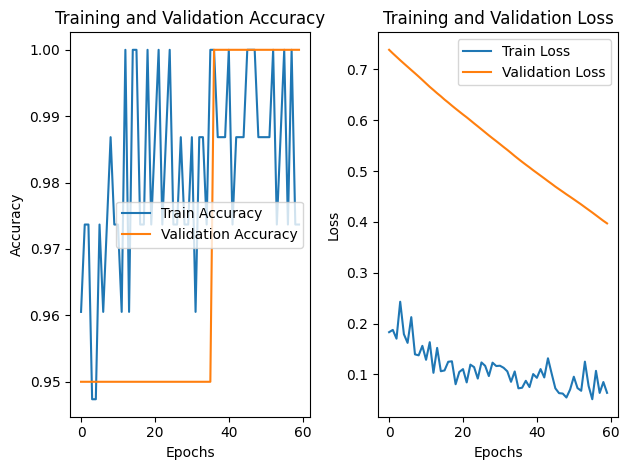

In [18]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [19]:
# Print the number of epochs used
print(f'Training stopped after {len(history.epoch)} epochs')

Training stopped after 60 epochs


In [20]:
# Print the number of epochs used
print(f'Training stopped after {len(history.epoch)} epochs')

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert the predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Decode the class labels if you used LabelEncoder
predicted_classes = label_encoder.inverse_transform(predicted_classes)

# Print some example predictions
for i in range(len(predicted_classes)):  # Loop through the first 90 predictions
    print(f"Predicted class: {predicted_classes[i]}, Actual class: {label_encoder.inverse_transform([y_test[i]])[0]}")

Training stopped after 60 epochs
1/1 [==============================] - 0s 283ms/step
Predicted class: 2, Actual class: 2
Predicted class: 2, Actual class: 2
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 2, Actual class: 2
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 3, Actual class: 3
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 1, Actual class: 1
Predicted class: 1, Actual class: 1
Predicted class: 3, Actual class: 3
Predicted class: 3, Actual class: 3
Predicted class: 3, Actual class: 3
Predicted class: 1, Actual class: 1
Predicted class: 3, Actual class: 3
Predicted class: 3, Actual class: 3
Predicted class: 2, Actual class: 2
Predicted class: 2, Actual class: 2
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 2, Actual class: 2
